# Circuit VS_RL1

In [ ]:
import villas.dataprocessing.readtools as rt
import villas.dataprocessing.plottools as pt
from villas.dataprocessing.timeseries import TimeSeries as ts

## The circuit model shows in below

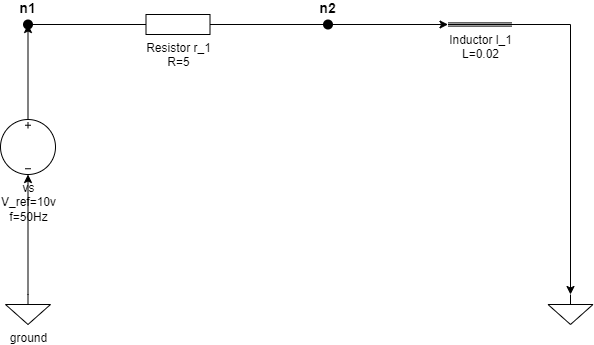

## DPsim EMT

In [ ]:
# DPsim EMT simulation
import dpsimpy

name = 'EMT_VS_RL1'

# Nodes
gnd = dpsimpy.emt.SimNode.gnd
n1 =  dpsimpy.emt.SimNode('n1')
n2 =  dpsimpy.emt.SimNode('n2')

# Components
vs = dpsimpy.emt.ph1.VoltageSource('vs')
vs.set_parameters(V_ref=complex(10,0), f_src=50)
r1 = dpsimpy.emt.ph1.Resistor('r1')
r1.set_parameters(R=5)
l1 = dpsimpy.emt.ph1.Inductor('l1')
l1.set_parameters(L=0.02)

vs.connect([gnd, n1])
r1.connect([n1, n2])
l1.connect([n2, gnd])

system = dpsimpy.SystemTopology(50, [gnd, n1, n2], [vs, l1, r1])

logger = dpsimpy.Logger(name)
logger.log_attribute('n1.v', 'v', n1);
logger.log_attribute('n2.v', 'v', n2);
logger.log_attribute('r1.i_intf', 'i_intf', r1);

sim = dpsimpy.Simulation(name)
sim.add_logger(logger)
sim.set_system(system)
sim.set_domain(dpsimpy.Domain.EMT)
sim.set_time_step(0.0001)
sim.set_final_time(0.1)

sim.run()

In [ ]:
# read EMT results
#work_dir = '../../dpsim/Logs/'
work_dir = 'logs/'
log_name = 'EMT_VS_RL1'
print(work_dir + log_name + '.csv')

ts_dpsim_emt = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')

In [ ]:
#v1 = 'v1'
#v2 = 'v2'
#i12 = 'i12'
v1 = 'n1.v'
v2 = 'n2.v'
i12 = 'r1.i_intf'

ts_dpsim_emt['n1.v'].label = 'v1 EMT'
ts_dpsim_emt['n2.v'].label = 'v2 EMT'
ts_dpsim_emt['r1.i_intf'].label = 'i12 EMT'
pt.plot_timeseries(1, ts_dpsim_emt['n1.v'])
pt.plot_timeseries(1, ts_dpsim_emt['n2.v'])
pt.plot_timeseries(2, ts_dpsim_emt['r1.i_intf'])

## DPsim DP

In [ ]:
import dpsimpy

name = 'DP_VS_RL1'

# Nodes
gnd = dpsimpy.dp.SimNode.gnd
n1 =  dpsimpy.dp.SimNode('n1')
n2 =  dpsimpy.dp.SimNode('n2')

# Components
vs = dpsimpy.dp.ph1.VoltageSource('vs')
vs.set_parameters(V_ref=complex(10,0))
r1 = dpsimpy.dp.ph1.Resistor('r1')
r1.set_parameters(R=5)
l1 = dpsimpy.dp.ph1.Inductor('l1')
l1.set_parameters(L=0.02)

vs.connect([gnd, n1])
r1.connect([n1, n2])
l1.connect([n2, gnd])

system = dpsimpy.SystemTopology(50, [gnd, n1, n2], [vs, l1, r1])

logger = dpsimpy.Logger(name)
logger.log_attribute('n1.v', 'v', n1);
logger.log_attribute('n2.v', 'v', n2);
logger.log_attribute('r1.i_intf', 'i_intf', r1);

sim = dpsimpy.Simulation(name)
sim.add_logger(logger)
sim.set_system(system)
sim.set_domain(dpsimpy.Domain.DP)
sim.set_time_step(0.0001)
sim.set_final_time(0.1)

sim.run()

In [ ]:
# read DPsim DP results
work_dir = 'logs/'
log_name = 'DP_VS_RL1'
print(work_dir + log_name + '.csv')

ts_dpsim_dp = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')

In [ ]:
# convert to emt
ts_dpsim_dp_emt = ts.frequency_shift_list(ts_dpsim_dp, 50)

In [ ]:
pt.set_timeseries_labels(ts_dpsim_dp_emt['n1.v_shift'], 'v1 DP')
pt.set_timeseries_labels(ts_dpsim_dp_emt['n2.v_shift'], 'v2 DP')
pt.set_timeseries_labels(ts_dpsim_dp_emt['r1.i_intf_shift'], 'i12 DP')
pt.plot_timeseries(1, ts_dpsim_dp_emt['n1.v_shift'])
pt.plot_timeseries(1, ts_dpsim_dp_emt['n2.v_shift'])
pt.plot_timeseries(2, ts_dpsim_dp_emt['r1.i_intf_shift'])

## Simulink reference results

In [ ]:
# read Simulink log file
import os
import urllib.request

if not os.path.exists('reference-results'):
    os.mkdir('reference-results')

url = 'https://git.rwth-aachen.de/acs/public/simulation/reference-results/raw/master/Simulink/Circuits/SL_VS_RL1.csv'
local_file = 'reference-results/SL_VS_RL1.csv'
urllib.request.urlretrieve(url, local_file) 

ts_sl = rt.read_timeseries_simulink(local_file)

In [ ]:
pt.set_timeseries_labels(ts_sl['v1'], 'v1 SL')
pt.set_timeseries_labels(ts_sl['v2'], 'v2 SL')
pt.set_timeseries_labels(ts_sl['i12'], 'i12 SL')
pt.plot_timeseries(1, ts_sl['v1'])
pt.plot_timeseries(1, ts_sl['v2'])
pt.plot_timeseries(2, ts_sl['i12'])

## Comparison

In [ ]:
#v1 = 'v1'
#v2 = 'v2'
#i12 = 'i12'
v1 = 'n1.v'
v2 = 'n2.v'
i12 = 'r1.i_intf'

# plot v1
pt.plot_timeseries(1, ts_dpsim_emt['n1.v'])
pt.plot_timeseries(1, ts_dpsim_dp_emt['n1.v_shift'])
pt.plot_timeseries(1, ts_sl['v1'])
# plot v2
pt.plot_timeseries(2, ts_dpsim_emt['n2.v'])
pt.plot_timeseries(2, ts_dpsim_dp_emt['n2.v_shift'])
pt.plot_timeseries(2, ts_sl['v2'])
# plot i12
pt.plot_timeseries(3, ts_dpsim_emt['r1.i_intf'])
pt.plot_timeseries(3, ts_dpsim_dp_emt['r1.i_intf_shift'])
ts_sl_scale = ts_sl['i12'].scale(-1)
ts_sl_scale.label = '-i12 SL'
pt.plot_timeseries(3, ts_sl_scale)

In [ ]:
# calculate the RMSE between Simulink (ts_sl) and EMT (ts_dpsim_emt)
err_sl_emt = 0
err_sl_emt += ts.rmse(ts_sl['v1'], ts_dpsim_emt['n1.v'])
err_sl_emt += ts.rmse(ts_sl['v2'], ts_dpsim_emt['n2.v'])
err_sl_emt = err_sl_emt / 2
print("Total RMSE of Simulink reference and DPsim EMT: %g" % (err_sl_emt))

# calculate the RMSE between Simulink (ts_sl) and DP (ts_dpsim_dp_emt)
err_sl_dp = 0
err_sl_dp += ts.rmse(ts_sl['v1'], ts_dpsim_dp_emt['n1.v_shift'])
err_sl_dp += ts.rmse(ts_sl['v2'], ts_dpsim_dp_emt['n2.v_shift'])
err_sl_dp = err_sl_dp / 2
print("Total RMSE of Simulink reference and DPsim DP: %g" % (err_sl_dp))

In [ ]:
assert err_sl_emt < 0.1
assert err_sl_dp < 0.1